In [2]:
import pandas as pd
import numpy as np

In [3]:
#importing dataset
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [4]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [7]:
df.sample(17)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
42,Prof,B,40,27,Male,101299
147,Prof,B,27,27,Male,156938
273,AsstProf,A,8,4,Male,74000
93,Prof,B,38,38,Male,166024
14,Prof,B,20,18,Male,104800
89,AssocProf,B,9,7,Male,107008
326,Prof,B,23,15,Male,124714
325,AsstProf,B,8,4,Male,84500
10,AssocProf,B,12,8,Male,119800
258,AsstProf,A,9,3,Male,73800


In [8]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [9]:
df.shape

(397, 6)

In [10]:
df= df.drop_duplicates()

In [11]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [12]:
#checking if there are any null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [13]:
df.isnull().sum().sum()

0

In [14]:
#We can see there are no null values, so we are good to proceed!

In [15]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [16]:
#We can see there are 3 object columns; let us see the unique values of these columns

df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [17]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [18]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
#let us consider the nominal columns 'rank', 'discipline' and 'sex'

df_visualization_nominal= df[['rank','discipline','sex']].copy()

In [20]:
df_visualization_nominal

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [21]:
#Data Visualization
#For the nominal categorical data we analyse countplot because it will give the frequency of the classes of the columns.

In [22]:
import seaborn as sns

Prof         266
AssocProf     64
AsstProf      63
Name: rank, dtype: int64


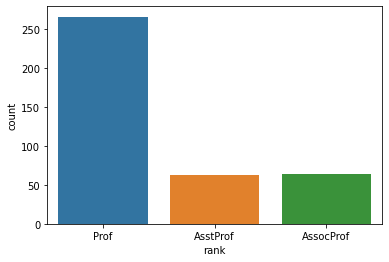

In [23]:
ax= sns.countplot(x= 'rank', data= df_visualization_nominal)
print(df_visualization_nominal['rank'].value_counts())

B    212
A    181
Name: discipline, dtype: int64


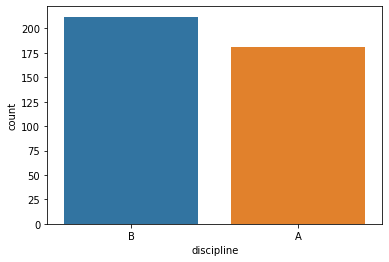

In [24]:
ax= sns.countplot(x= 'discipline', data= df_visualization_nominal)
print(df_visualization_nominal['discipline'].value_counts())

Male      354
Female     39
Name: sex, dtype: int64


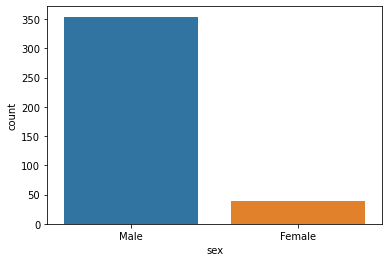

In [25]:
ax= sns.countplot(x= 'sex', data= df_visualization_nominal)
print(df_visualization_nominal['sex'].value_counts())

In [26]:
#we can see from above, all the number of frequencies added up and we get the data size of 393; so these counts are correct!

In [27]:
#now we will check the distribution of the float type columns
df_visualization_continuous= df[['yrs.since.phd','yrs.service','salary']].copy()

In [28]:
df_visualization_continuous.columns

Index(['yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

<AxesSubplot:xlabel='salary', ylabel='Count'>

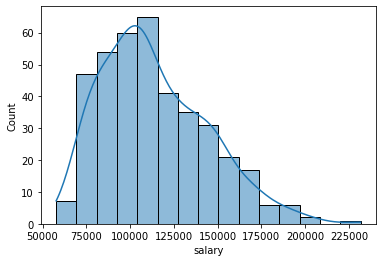

In [29]:
import seaborn as sns
sns.histplot(df_visualization_continuous['salary'], kde= True)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Count'>

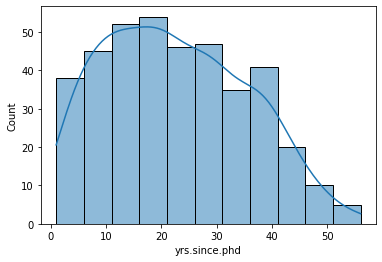

In [30]:
sns.histplot(df_visualization_continuous['yrs.since.phd'], kde= True)

<AxesSubplot:xlabel='yrs.service', ylabel='Count'>

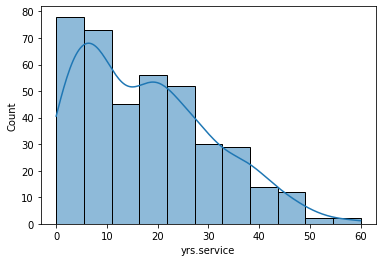

In [31]:
sns.histplot(df_visualization_continuous['yrs.service'], kde= True)

In [32]:
#since, we have seen there are 3 object type columns are there, we need to encode these columnns in order to convert the string values into numerical ones

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [33]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

C:\Users\solan\AppData\Local\Temp/ipykernel_30272/3753263363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
C:\Users\solan\AppData\Local\Temp/ipykernel_30272/3753263363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
C:\Users\solan\AppData\Local\Temp/ipykernel_30272/3753263363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [34]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [35]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,1.513995,0.539440,22.503817,17.755725,0.900763,113930.844784
std,0.759587,0.499077,12.814637,12.996129,0.299361,30360.608788
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,17.000000,1.000000,107500.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134550.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [36]:
df['rank'].unique()

array([2., 1., 0.])

In [37]:
df['discipline'].unique()

array([1., 0.])

In [38]:
df['sex'].unique()

array([1., 0.])

In [39]:
#let us make a heatmap

<AxesSubplot:>

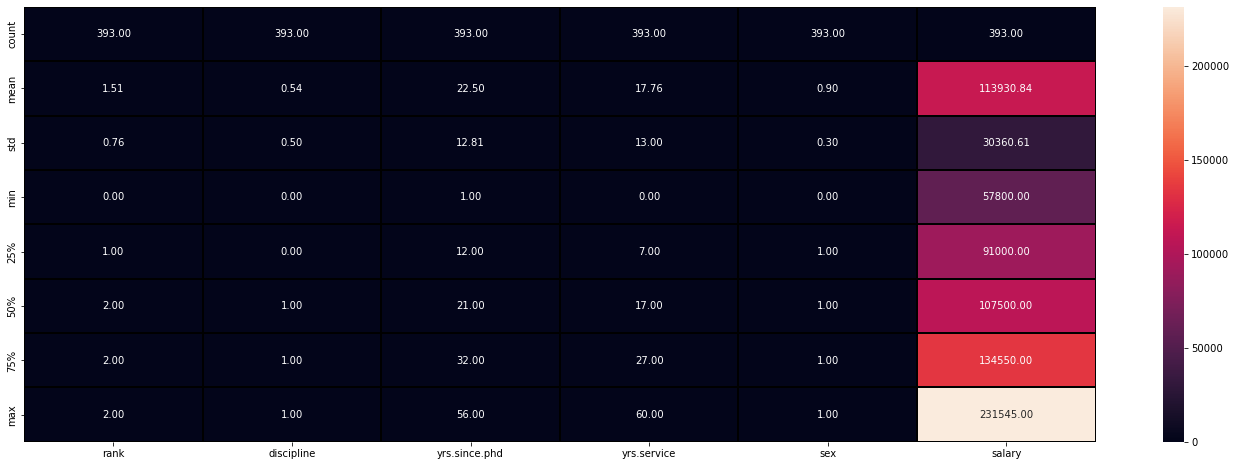

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.describe(), annot= True, linewidths= 0.1, linecolor= 'black', fmt= '0.2f')

In [41]:
#correlation of the columns with the target column

In [42]:
df.corr()['salary'].sort_values()

sex              0.141521
discipline       0.164018
yrs.service      0.329624
yrs.since.phd    0.414042
rank             0.519823
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

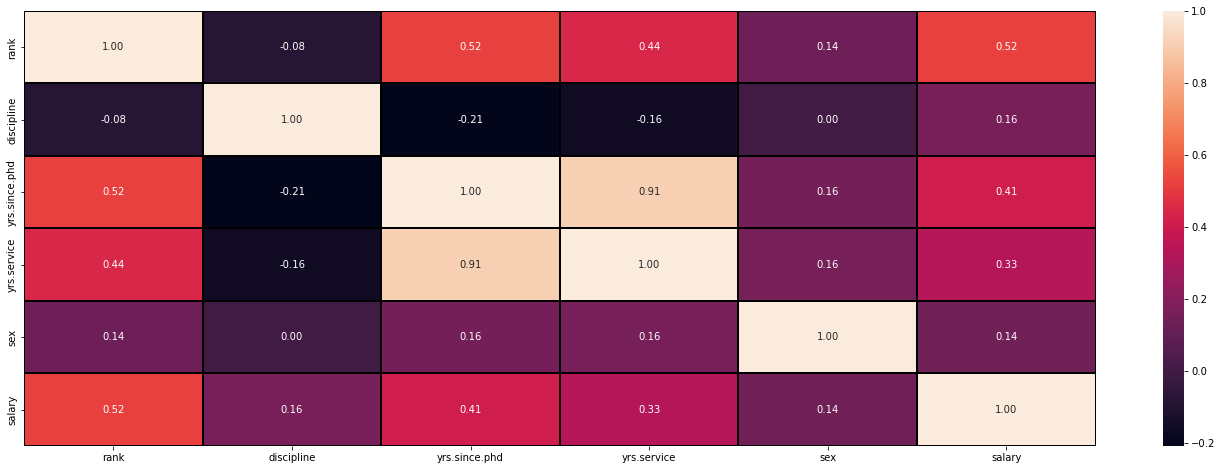

In [43]:
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot= True, linewidths= 0.1, linecolor= 'black', fmt= '0.2f')

In [44]:
#let us now check the columns which are positively and/or negatively correlated with the target column.

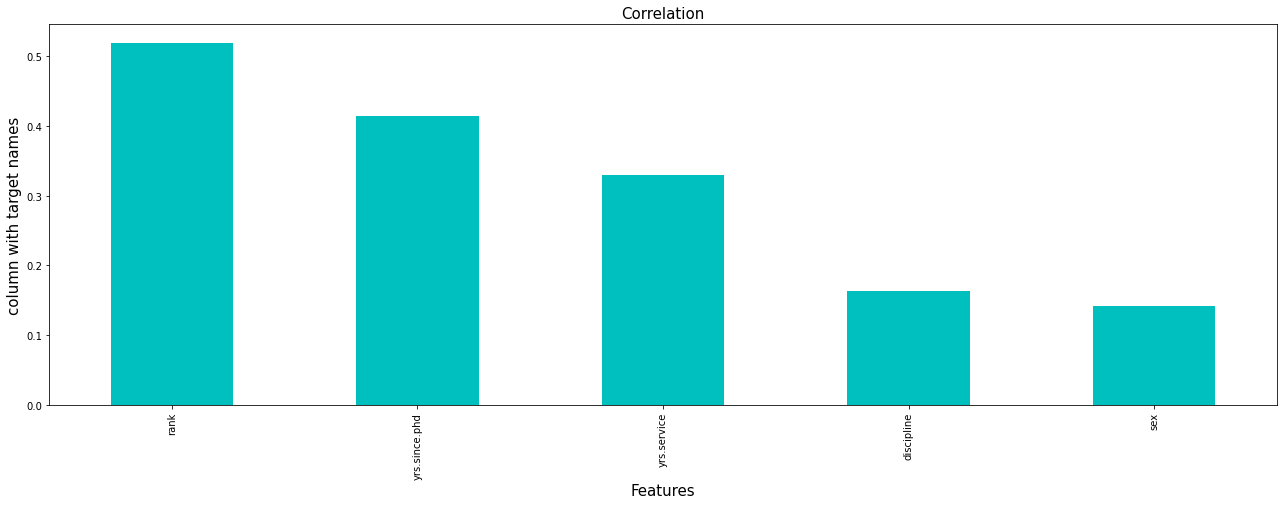

In [45]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar', color='c')
plt.xlabel('Features', fontsize=15)
plt.ylabel('column with target names', fontsize= 15)
plt.title('Correlation', fontsize= 15)
plt.show()

In [46]:
#skewness

df.skew()

rank            -1.170826
discipline      -0.158861
yrs.since.phd    0.295915
yrs.service      0.638491
sex             -2.691158
salary           0.698471
dtype: float64

In [47]:
#outliers check

df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

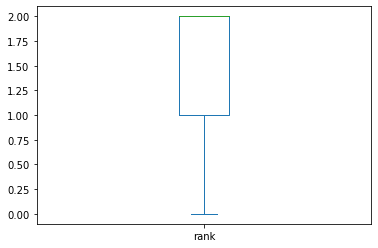

In [48]:
df['rank'].plot.box()

<AxesSubplot:>

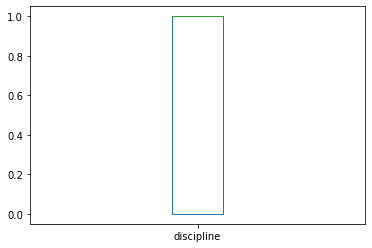

In [49]:
df['discipline'].plot.box()

<AxesSubplot:>

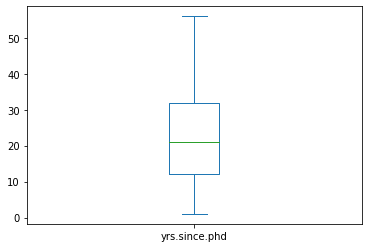

In [50]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

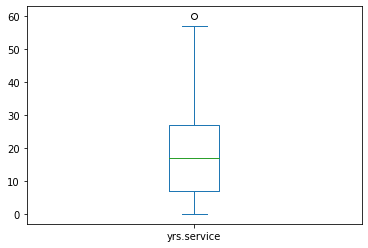

In [51]:
df['yrs.service'].plot.box()

<AxesSubplot:>

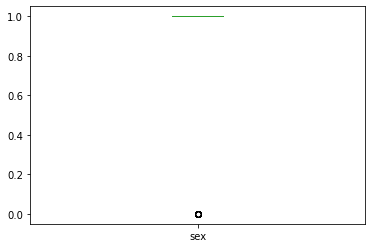

In [52]:
df['sex'].plot.box()

In [53]:
#consider the outliers removal
df.shape

(393, 6)

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 152, 177, 184, 214,
        226, 227, 229, 233, 241, 249, 250, 270, 312, 319, 326, 328, 330,
        337, 354, 357, 360], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [55]:
df_new_z= df[(z<3).all(axis=1)]
df_new_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [56]:
df_new_z.shape

(350, 6)

In [57]:
df_new_z['rank'].unique()

array([2., 1., 0.])

In [58]:
df_new_z['discipline'].unique()

array([1., 0.])

In [59]:
df_new_z['yrs.since.phd'].unique()

array([19, 20,  4, 45, 40,  6, 30, 21, 12,  7,  1,  2, 38, 37, 31, 36, 34,
       24, 35,  5, 11, 13, 22, 41,  9, 23, 25, 28, 16, 14, 10,  8,  3, 33,
       17, 29, 26, 43, 15, 42, 18, 39, 32, 54, 27, 48, 46, 47, 52, 51, 49,
       56, 44], dtype=int64)

In [60]:
df_new_z['yrs.service'].unique()

array([18, 16,  3, 39, 41,  6, 23, 45, 20,  8,  2,  1,  0, 34, 26, 31, 30,
       19,  4,  9, 21, 27, 15, 28, 11,  5, 12, 36, 14, 37, 25,  7, 38, 10,
       29, 32, 22, 49, 24, 53, 33, 40, 17, 35, 43, 44, 48, 46, 51, 13],
      dtype=int64)

In [61]:
df_new_z['sex'].unique()

array([1.])

In [62]:
# Our data is becoming biased as it is not considering the case of females. So we will not remove the outliers.

In [63]:
#Seperating the columns into target features

In [64]:
features= df.drop(['salary'], axis=1)
target= df['salary']

In [65]:
features

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [66]:
target

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

In [67]:
#scaling the data using min-max scaler

from sklearn.preprocessing import StandardScaler
mms= StandardScaler()

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [68]:
scale = StandardScaler()

df = scale.fit_transform(df)
df

array([[ 0.64064389,  0.92399869, -0.27377157,  0.01881993,  0.3319179 ,
         0.85150028],
       [ 0.64064389,  0.92399869, -0.19563633, -0.13526822,  0.3319179 ,
         1.95466125],
       [-0.67753961,  0.92399869, -1.44580016, -1.13684118,  0.3319179 ,
        -1.12726379],
       ...,
       [ 0.64064389, -1.08225261,  1.52333895,  0.55812844,  0.3319179 ,
        -0.40211272],
       [ 0.64064389, -1.08225261,  0.19503987, -0.21231229,  0.3319179 ,
        -0.6134777 ],
       [-0.67753961, -1.08225261, -1.1332592 , -1.05979711,  0.3319179 ,
        -1.08488526]])

In [69]:
print(mms.fit(features))

StandardScaler()


In [70]:
print(mms.transform(features))

[[ 0.64064389  0.92399869 -0.27377157  0.01881993  0.3319179 ]
 [ 0.64064389  0.92399869 -0.19563633 -0.13526822  0.3319179 ]
 [-0.67753961  0.92399869 -1.44580016 -1.13684118  0.3319179 ]
 ...
 [ 0.64064389 -1.08225261  1.52333895  0.55812844  0.3319179 ]
 [ 0.64064389 -1.08225261  0.19503987 -0.21231229  0.3319179 ]
 [-0.67753961 -1.08225261 -1.1332592  -1.05979711  0.3319179 ]]


In [71]:
new_features= mms.transform(features)

In [72]:
new_features

array([[ 0.64064389,  0.92399869, -0.27377157,  0.01881993,  0.3319179 ],
       [ 0.64064389,  0.92399869, -0.19563633, -0.13526822,  0.3319179 ],
       [-0.67753961,  0.92399869, -1.44580016, -1.13684118,  0.3319179 ],
       ...,
       [ 0.64064389, -1.08225261,  1.52333895,  0.55812844,  0.3319179 ],
       [ 0.64064389, -1.08225261,  0.19503987, -0.21231229,  0.3319179 ],
       [-0.67753961, -1.08225261, -1.1332592 , -1.05979711,  0.3319179 ]])

In [73]:
for i in range (0,100):
    new_features_train, new_features_test, target_train, target_test= train_test_split(new_features, target, test_size= 0.25, random_state= i)
    lr.fit(new_features_train, target_train)
    pred_train= lr.predict(new_features_train)
    pred_test= lr.predict(new_features_test)
    
    print(f'At random state {i}, the training accuracy is:- {r2_score(target_train, pred_train)}')
    print(f'At random state {i}, the testing accuracy is:- {r2_score(target_test, pred_test)}')
    print("\n")
    


At random state 0, the training accuracy is:- 0.3874412903077977
At random state 0, the testing accuracy is:- 0.30621702403002793


At random state 1, the training accuracy is:- 0.3733328712577041
At random state 1, the testing accuracy is:- 0.3422799185448192


At random state 2, the training accuracy is:- 0.33879804522149326
At random state 2, the testing accuracy is:- 0.46147579947403683


At random state 3, the training accuracy is:- 0.3815540576692894
At random state 3, the testing accuracy is:- 0.30045157035899717


At random state 4, the training accuracy is:- 0.3711836669002403
At random state 4, the testing accuracy is:- 0.3371115691944161


At random state 5, the training accuracy is:- 0.3893580196288007
At random state 5, the testing accuracy is:- 0.3023689750058359


At random state 6, the training accuracy is:- 0.36540304586841243
At random state 6, the testing accuracy is:- 0.37856328136202066


At random state 7, the training accuracy is:- 0.33791534443851134
At random s

In [74]:
new_features_train, new_features_test, target_train, target_test= train_test_split(new_features, target, test_size= .25, random_state= 70)


In [75]:
#train the model 
lr.fit(new_features_train, target_train)

LinearRegression()

In [76]:
pred_test= lr.predict(new_features_test)

In [77]:
print(r2_score(target_test, pred_test))

0.49327104597811


In [78]:
#cross-validation of the model

In [79]:
train_accuracy= r2_score(target_train, pred_train)
test_accuracy= r2_score(target_test, pred_test)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score= cross_val_score(lr,new_features, target, cv=j)
    cv_mean= cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for test is {test_accuracy}')
    print("\n")

At cross fold 2 the cv score is 0.314893481152733 and accuracy score for training is -0.3043479199514971 and accuracy score for test is 0.49327104597811


At cross fold 3 the cv score is 0.31248971419839044 and accuracy score for training is -0.3043479199514971 and accuracy score for test is 0.49327104597811


At cross fold 4 the cv score is 0.31032286166860573 and accuracy score for training is -0.3043479199514971 and accuracy score for test is 0.49327104597811


At cross fold 5 the cv score is 0.2907057248082884 and accuracy score for training is -0.3043479199514971 and accuracy score for test is 0.49327104597811


At cross fold 6 the cv score is 0.3290500490712574 and accuracy score for training is -0.3043479199514971 and accuracy score for test is 0.49327104597811


At cross fold 7 the cv score is 0.3230702935616304 and accuracy score for training is -0.3043479199514971 and accuracy score for test is 0.49327104597811


At cross fold 8 the cv score is 0.32542701328785806 and accurac

In [80]:
#since the number of folds does not have any impact the accuracy we take cv=5

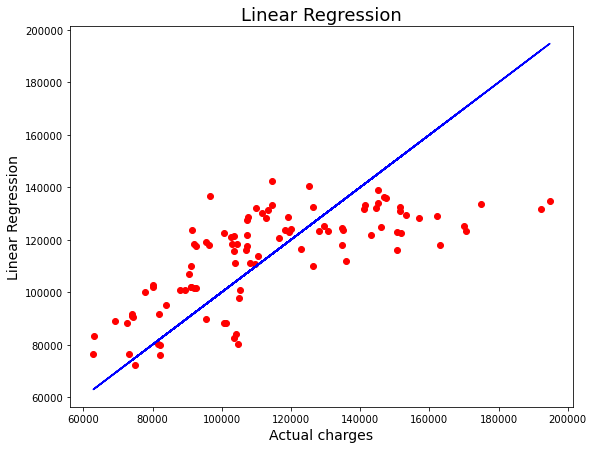

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,7))
plt.scatter(x=target_test, y= pred_test, color= 'r')
plt.plot(target_test, target_test, color= 'b')
plt.xlabel('Actual charges', fontsize= 14)
plt.ylabel('Linear Regression', fontsize= 14)
plt.title('Linear Regression', fontsize= 18)
plt.savefig('lr.png')
plt.show()

In [82]:
#regularization

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [84]:
from sklearn.linear_model import Lasso

parameters= {'alpha': [.0001, .001, .01, .1, 1, 10],
            'random_state': list(range(0,10))}
ls= Lasso()
clf= GridSearchCV(ls, parameters)
clf.fit(new_features_train, target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [85]:
#final model training

In [86]:
ls= Lasso(alpha=1, random_state=0)
ls.fit(new_features_train, target_train)
ls_score_training= ls.score(new_features_train, target_train)
pred_ls= ls.predict(new_features_test)

ls_score_training*100

33.13942701398995

In [87]:
pred_ls= ls.predict(new_features_test)

In [88]:
lss= r2_score(target_test, pred_ls)
lss*100

49.32598303447858

In [89]:
cv_score= cross_val_score(ls, new_features, target, cv=5)
cv_mean= cv_score.mean()
cv_mean*100

29.07451249263973

In [90]:
#Ensemble Techniques

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters= {'criterion': ['mse','mae'],
            'max_features':['auto','sqrt','log2']}

rf= RandomForestRegressor()
clf= GridSearchCV(rf, parameters)
clf.fit(new_features_train, target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [92]:
rf= RandomForestRegressor(criterion= 'mae', max_features= 'auto')
rf.fit(new_features_train, target_train)
rf.score(new_features_train, target_train)
pred_decision= rf.predict(new_features_test)

rfs= r2_score(target_test, pred_decision)
print('R2 score:', rfs*100)

rfscore= cross_val_score(rf, new_features, target, cv=5)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 score: 37.816079937472246
Cross Val Score: 26.50242149429963


In [93]:
import pickle
filename= 'churn.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [94]:
[]

[]

In [95]:
#conclusion

In [96]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(new_features_test, target_test)
print(result*100)

49.327104597811


In [97]:
conclusion= pd.DataFrame([loaded_model.predict(new_features_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [98]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
Predicted,116064.512538,136238.105338,131577.970089,122847.590276,131915.75773,100205.068638,142482.521221,123723.428,121306.73329,122955.929186,...,123407.743745,100793.0135,116380.196794,88164.137893,111998.181511,113941.570049,123853.698945,131992.220358,118144.03138,91599.100411
Original,133956.870000,132415.640000,116131.360000,128601.595000,113125.76500,77813.185000,114456.790000,144931.150,96899.50500,114137.100000,...,129433.255000,83870.4450,125224.985000,68626.900000,118580.590000,114939.760000,144534.405000,147045.290000,119878.19500,79402.800000
